In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


회귀선이 있는 산점도

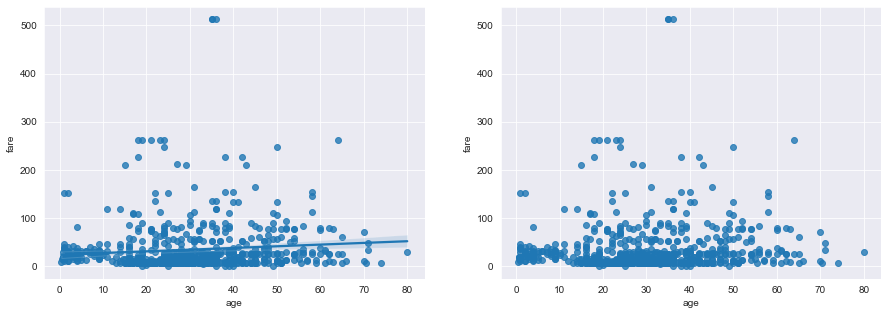

In [2]:
sns.set_style('darkgrid') # 스타일 설정(darkgrid, whitegrid, dark, white, ticks)

fig = plt.figure(figsize=(15,5)) # 사이즈 및 서브플롯 설정
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age', # x축 변수
           y='fare', # y축 변수
           data=titanic, # 사용할 데이터
           ax=ax1) # 사용할 axe 객체
sns.regplot(x='age',y='fare',data=titanic, ax=ax2, fit_reg=False) # fit_reg=Flase를 통해 선형회귀선 미표시

plt.show()

히스토그램/커널밀도 그래프

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


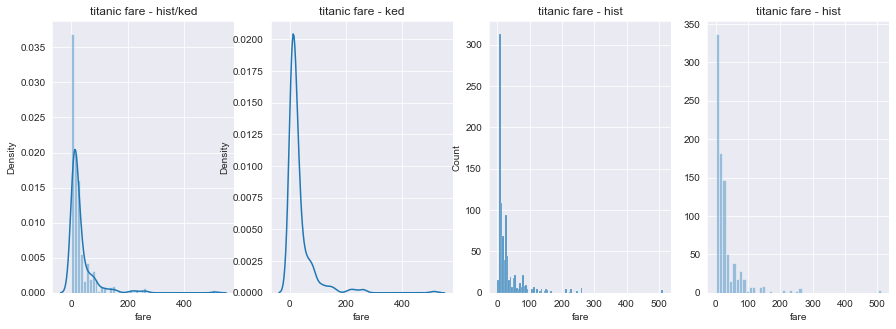

In [3]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

sns.distplot(titanic['fare'], ax=ax1) # 히스토그램과 커널밀도함수 동시에
sns.kdeplot(x='fare', data=titanic, ax=ax2) # 커널밀도함수
sns.histplot(x='fare', data=titanic, ax=ax3) # 히스토그램
sns.distplot(titanic['fare'], ax=ax4, kde=False) # 커널밀도함수 미표시, hist=False도 가능

ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')
ax4.set_title('titanic fare - hist')

plt.show()

heatmap

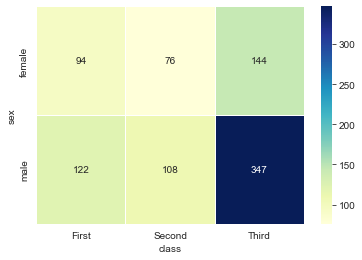

In [4]:
table = titanic.pivot_table(index='sex', columns='class', aggfunc='size') # 피벗테이블 생성

sns.heatmap(table, # 사용 데이터
           annot=True, # 데이터 값 표시 여부
           fmt='d', # 데이터 값 표시 형식(정수형)
           cmap='YlGnBu', # 색상맵
           lw=0.5, # 구분선 두께
           cbar=True) # 컬러바 표시 여부

plt.show()

범주형 데이터의 산점도

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


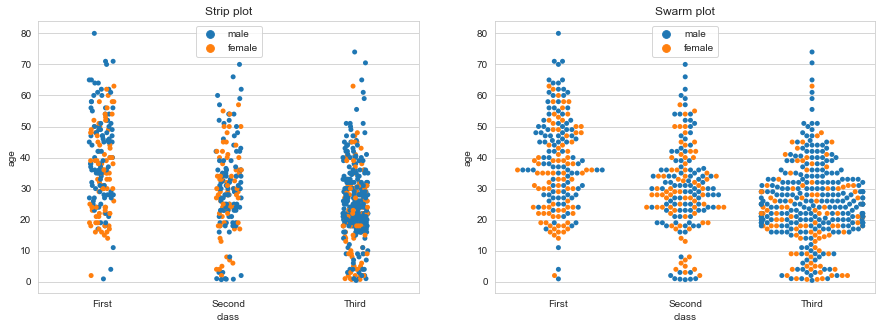

In [5]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class', y='age', data=titanic, ax=ax1, hue='sex')
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2, hue='sex')

ax1.set_title('Strip plot')
ax2.set_title('Swarm plot')
ax1.legend(loc=0)
ax2.legend(loc=0)

plt.show()

barplot

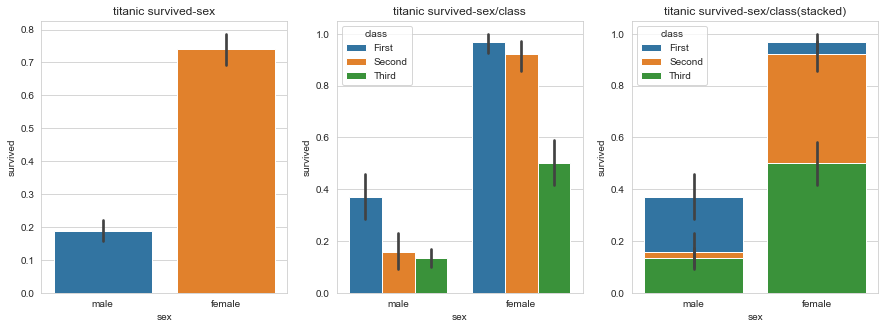

In [6]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) # 단순 막대 그래프
sns.barplot(x='sex', y='survived', data=titanic, ax=ax2, hue='class') # class에 따라 구분한 막대 그래프
sns.barplot(x='sex', y='survived', data=titanic, ax=ax3, hue='class', dodge=False) # class에따라 구분하고 누적 출력한 막대 그래프

ax1.set_title('titanic survived-sex')
ax2.set_title('titanic survived-sex/class')
ax3.set_title('titanic survived-sex/class(stacked)')

plt.show()

countplot

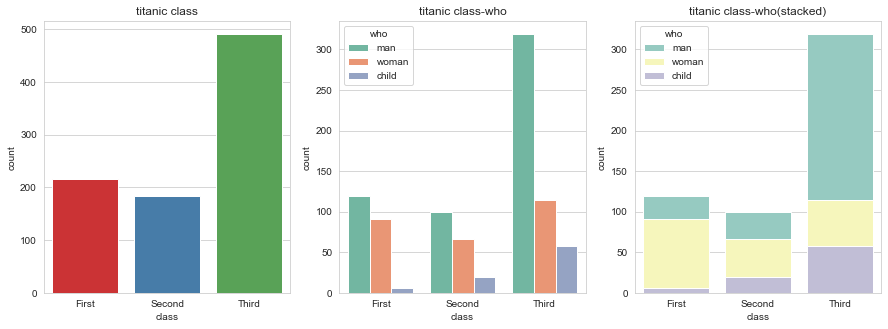

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1) # class의 값에 따른 빈도수
sns.countplot(x='class', palette='Set2', hue='who', data=titanic, ax=ax2) # who 컬럼의 값에 따라 색상 구분
sns.countplot(x='class', palette='Set3', hue='who', dodge=False, data=titanic, ax=ax3) # 누적 출력 여부 설정

ax1.set_title('titanic class')
ax2.set_title('titanic class-who')
ax3.set_title('titanic class-who(stacked)')

plt.show()

박스 플롯/바이올린 그래프

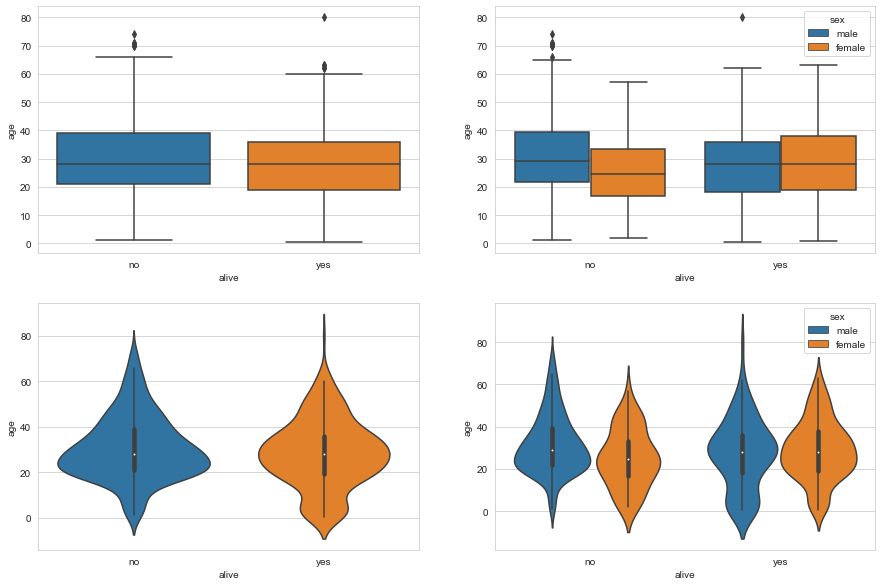

In [8]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

조인트 그래프

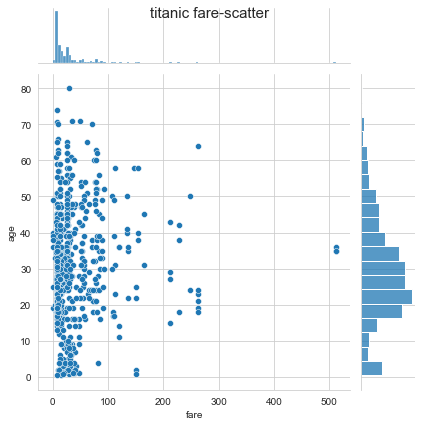

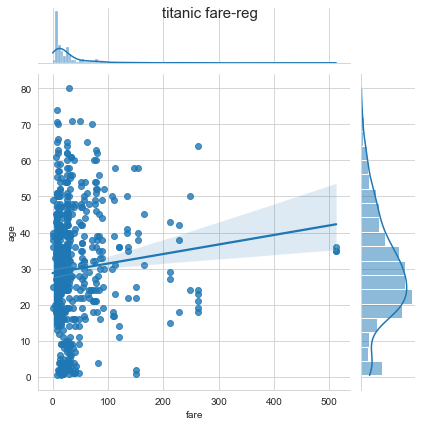

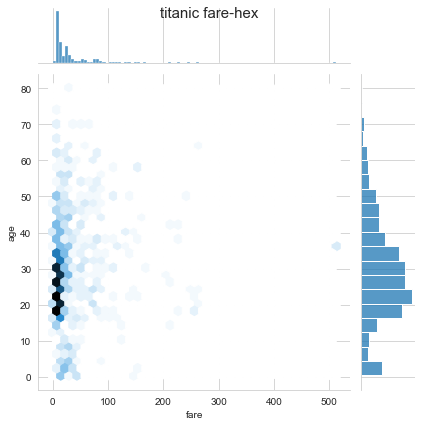

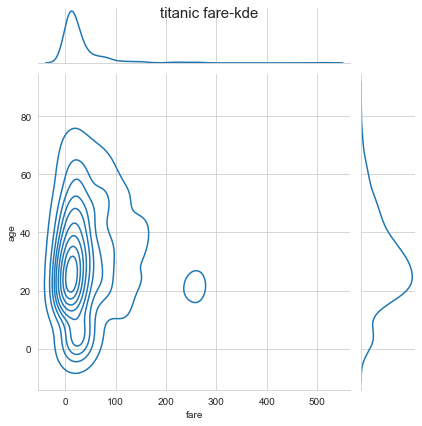

In [9]:
j1 = sns.jointplot(x='fare', y='age', data=titanic) # 산점도
j2 = sns.jointplot(x='fare', y='age', data=titanic, kind='reg') # 산점도에 회귀선 추가
j3 = sns.jointplot(x='fare', y='age', data=titanic, kind='hex') # 육각 산점도
j4 = sns.jointplot(x='fare', y='age', data=titanic, kind='kde') # 커널 밀도 함수

j1.fig.suptitle('titanic fare-scatter', size=15)
j2.fig.suptitle('titanic fare-reg', size=15)
j3.fig.suptitle('titanic fare-hex', size=15)
j4.fig.suptitle('titanic fare-kde', size=15)

plt.show()

조건을 적용하여 화면을 그리드로 분할하기

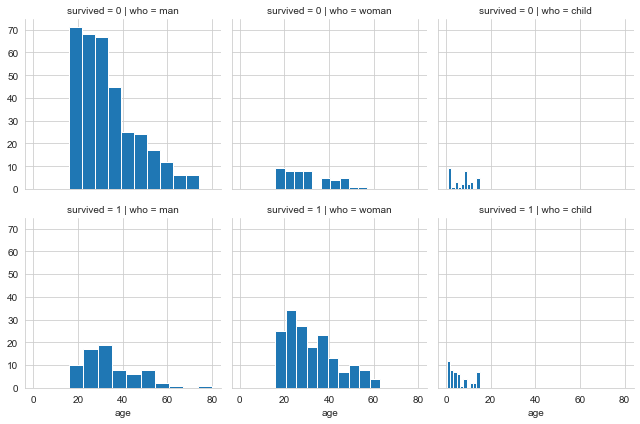

In [12]:
g = sns.FacetGrid(data=titanic, col='who', row='survived') # who컬럼의 값을 각 열로, survived 컬럼의 값을 각 행으로 그리드 객체 생성
g=g.map(plt.hist, 'age') # 생성된 그리드 객체 내 각 서브플롯에 plt.hist 함수를 age컬럼의 값에 대하여 수행

이변수 데이터의 분포
- 인자로 전달된 컬럼을 가지고 조합가능한 쌍에 대한 모든 결과를 표현
- 같은 열에 대해서는 히스토그램, 다른 열에 대해서는 산점도

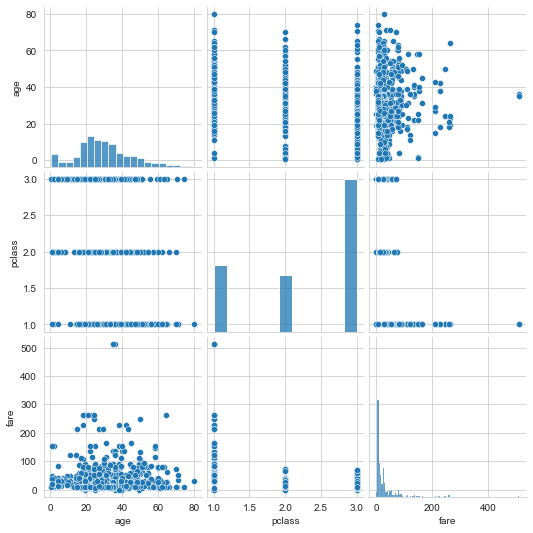

In [13]:
pair = titanic[['age','pclass','fare']]
g=sns.pairplot(pair)